<a href="https://colab.research.google.com/github/Rushhaabhhh/ML-learning/blob/main/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 6)

In [26]:
!gdown 1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg

Downloading...
From: https://drive.google.com/uc?id=1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg
To: /content/mobilesales.xlsx
100% 13.7k/13.7k [00:00<00:00, 28.6MB/s]


In [28]:
mobile_sales = pd.read_excel('/content/mobilesales.xlsx')
mobile_sales.head()

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0


In [38]:
print(mobile_sales.dtypes)

mobile_sales.describe()

DATE     datetime64[ns]
Sales           float64
dtype: object


,DATE,Sales
count,217,198.000000
mean,2009-12-31 04:25:26.267281152,10842.757576
min,2001-01-01 00:00:00,108.000000
25%,2005-07-01 00:00:00,8856.000000
50%,2010-01-01 00:00:00,10745.000000
75%,2014-07-01 00:00:00,12399.750000
max,2019-01-01 00:00:00,23740.000000
std,NaN,2605.006293


In [42]:
# Change the index from 0, 1, 2... to dates

mobile_sales.set_index('DATE', inplace=True)
mobile_sales.head(10)

,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0
2001-06-01,8104.0
2001-07-01,7813.0
2001-08-01,8279.0
2001-09-01,7014.0


<Axes: xlabel='DATE'>

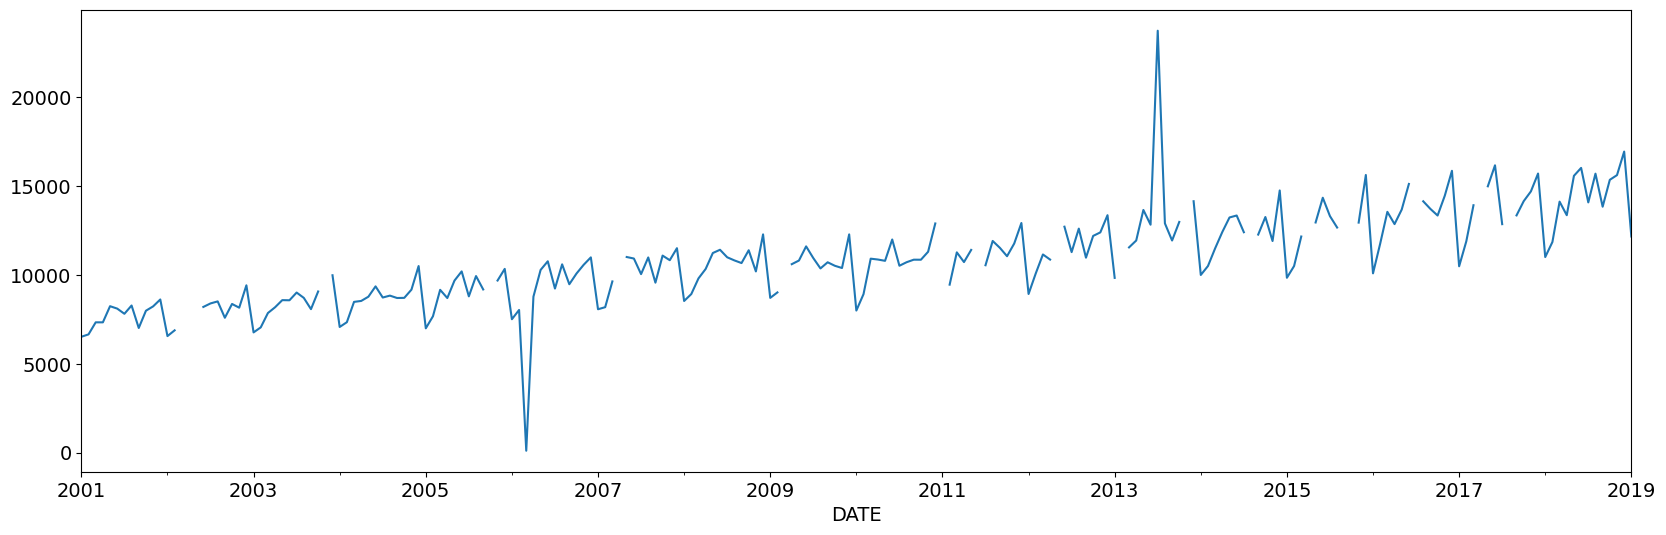

In [45]:
mobile_sales.Sales.plot()

In [51]:
# Number of breaks in the data

mobile_sales["Sales"].isna().sum()

19

In [53]:
mobile_sales.loc[mobile_sales.Sales.isna()]

,Sales
DATE,
2002-03-01,NaN
2002-04-01,NaN
2002-05-01,NaN
2003-11-01,NaN
2005-10-01,NaN
2007-04-01,NaN
2009-03-01,NaN
2011-01-01,NaN
2011-06-01,NaN


No charts were generated by quickchart


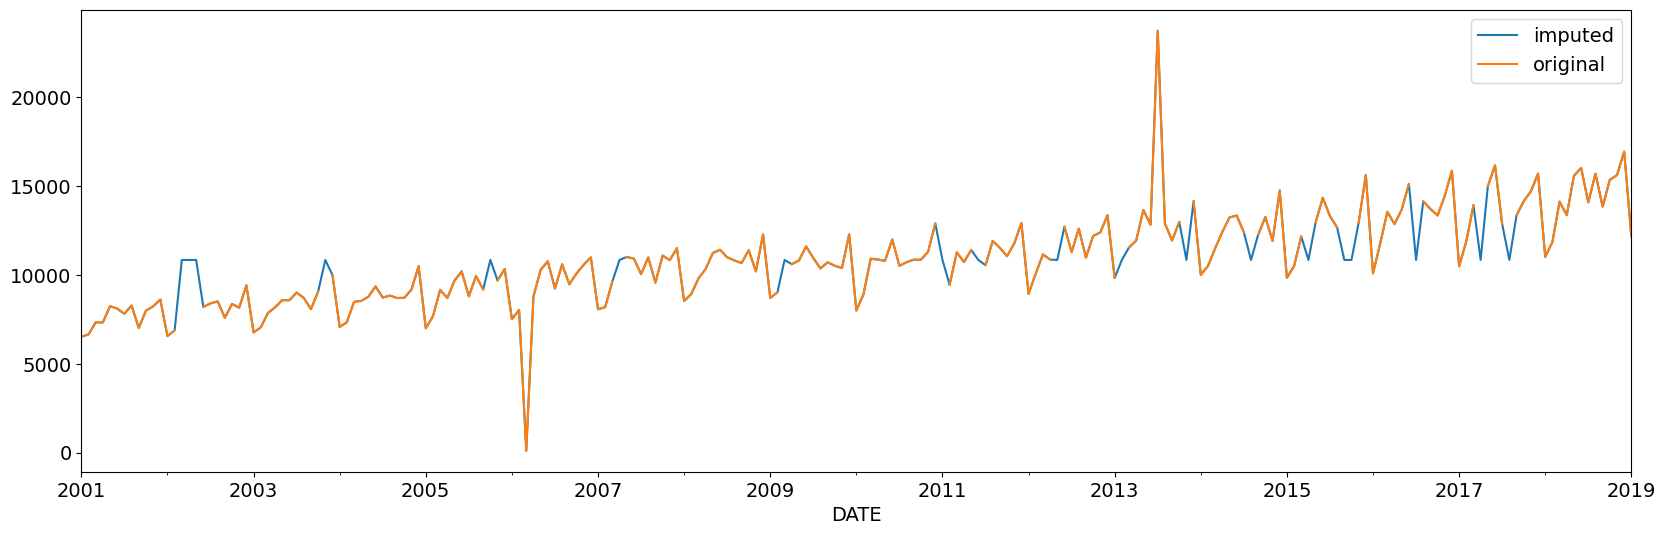

In [59]:
mobile_sales.Sales.fillna(mobile_sales.Sales.mean()).plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

<Axes: xlabel='DATE'>

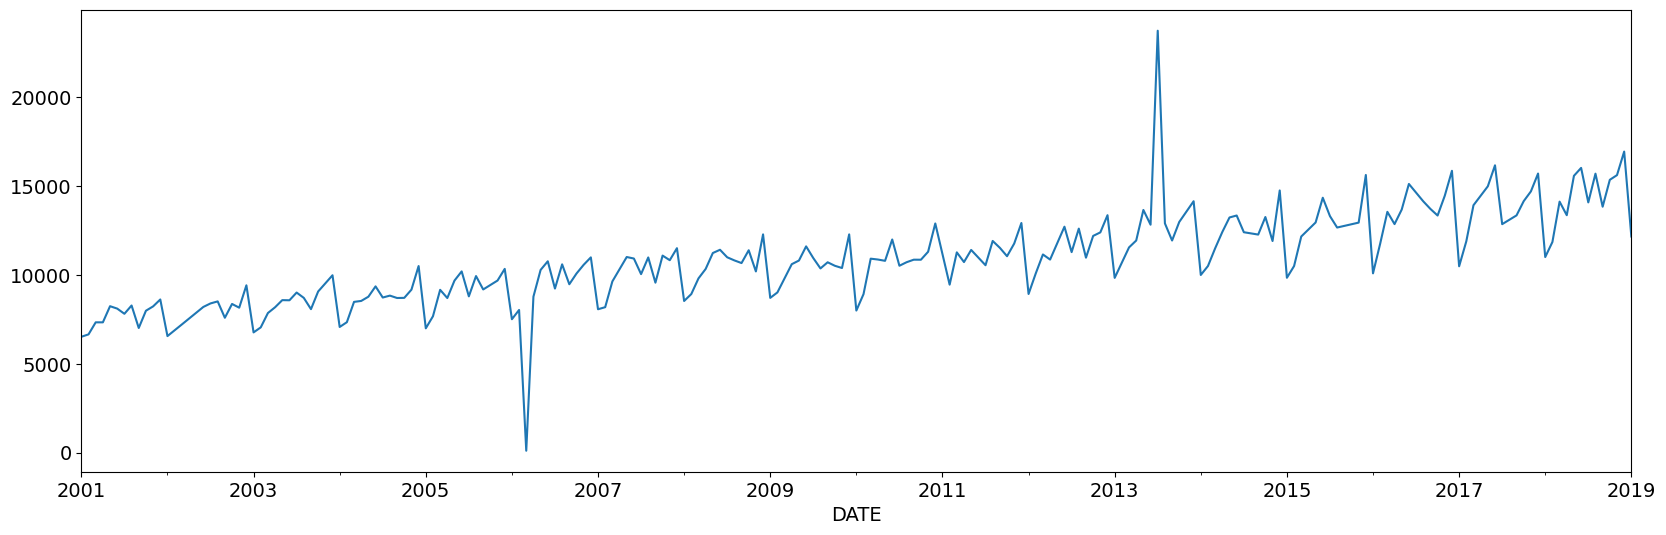

In [60]:
mobile_sales.Sales = mobile_sales.Sales.interpolate(method='linear')
mobile_sales.Sales.plot()

<Axes: xlabel='DATE'>

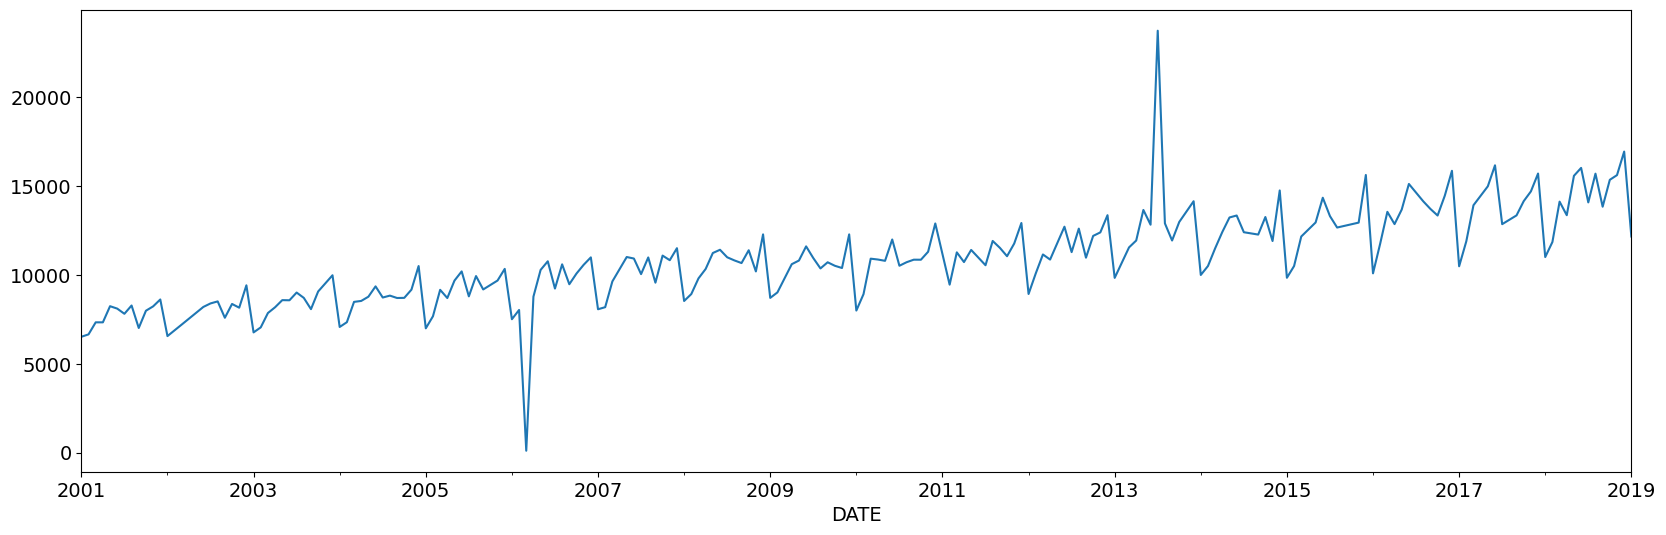

In [73]:
mobile_sales.Sales = mobile_sales.Sales.interpolate(method="polynomial", order=2)
mobile_sales.Sales.plot()

[]

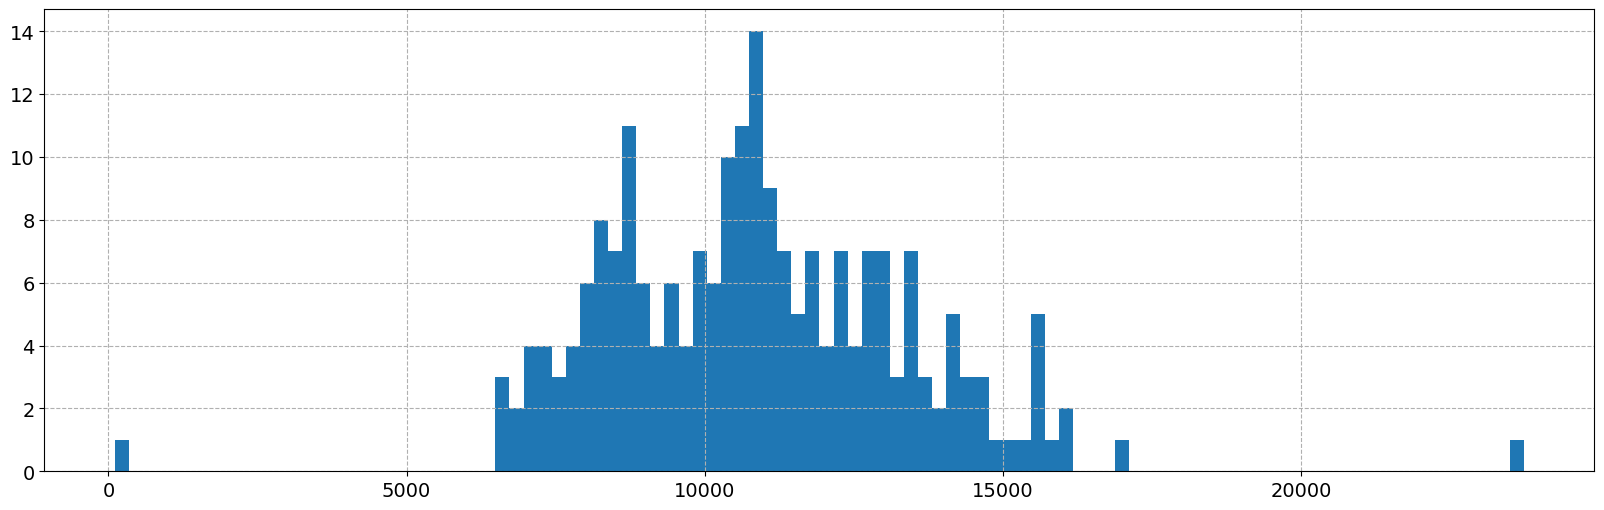

In [62]:
mobile_sales.Sales.hist(bins=100).plot()

In [64]:
print("95th percentile of the data : ", mobile_sales["Sales"].quantile(0.95))

95th percentile of the data :  15164.599999999997


<Axes: xlabel='DATE'>

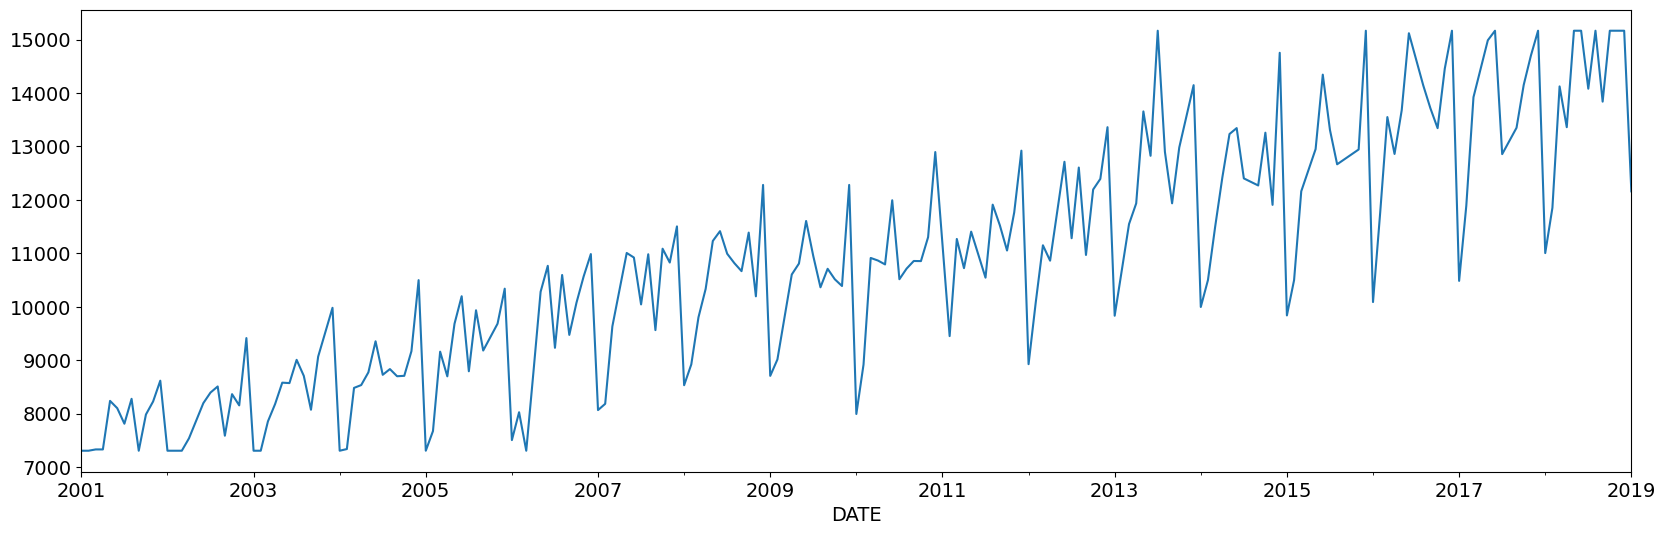

In [65]:
mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.95), lower=mobile_sales.Sales.quantile(0.05)).plot()